In [1]:
import generate_masterdf as gm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from generate_plots import subject_wise_error_plot, quick_visualization, distribution_plots
from helpers import variance_error_summary
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)

We have 16 subjects so far: ['sub01', 'sub03', 'sub05', 'sub06', 'sub07', 'sub08', 'sub12', 'sub13', 'sub14', 'sub15', 'sub16', 'sub17', 'sub18', 'sub22', 'sub23', 'sub24']

Loading existing dataframe! If this is not desired, delete the current mater_df.csv


In [2]:
df = gm.master_df
df = variance_error_summary(df)
print('Dataframe description')
df.info()

Dataframe description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subjID                  19200 non-null  int64  
 1   day                     19200 non-null  int64  
 2   tnum                    19200 non-null  int64  
 3   rnum                    19200 non-null  int64  
 4   istms                   19200 non-null  int64  
 5   ispro                   19200 non-null  int64  
 6   instimVF                19200 non-null  int64  
 7   bad_drift_correct       19200 non-null  int64  
 8   bad_calibration         19200 non-null  int64  
 9   breakfix                19200 non-null  int64  
 10  no_prim_sacc            19200 non-null  int64  
 11  small_sacc              19200 non-null  int64  
 12  large_error             19200 non-null  int64  
 13  rejtrials               19200 non-null  int64  
 14  TarX            

In [3]:
df.describe()
df.describe(include=object)

,trial_type,TMS_condition
count,19200,19200
unique,4,3
top,pro_intoVF,TMS intoVF
freq,4800,6400


In [4]:
n_rows_original = len(df)
# Filter out entries with 'rejtrials' == 1
df_filtered = df[(df['rejtrials'] != 1)].copy()
df_filtered = df_filtered.dropna()
n_rows_filtered = len(df_filtered)
print(f"Original = {n_rows_original}, after filtering = {n_rows_filtered} trials.")
print()
print('Dataframe description after filtering')
df_filtered.info()

Original = 19200, after filtering = 17267 trials.

Dataframe description after filtering
<class 'pandas.core.frame.DataFrame'>
Index: 17267 entries, 0 to 19199
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subjID                  17267 non-null  int64  
 1   day                     17267 non-null  int64  
 2   tnum                    17267 non-null  int64  
 3   rnum                    17267 non-null  int64  
 4   istms                   17267 non-null  int64  
 5   ispro                   17267 non-null  int64  
 6   instimVF                17267 non-null  int64  
 7   bad_drift_correct       17267 non-null  int64  
 8   bad_calibration         17267 non-null  int64  
 9   breakfix                17267 non-null  int64  
 10  no_prim_sacc            17267 non-null  int64  
 11  small_sacc              17267 non-null  int64  
 12  large_error             17267 non-null  int64  
 13  rejtria

-0.24972226852113988


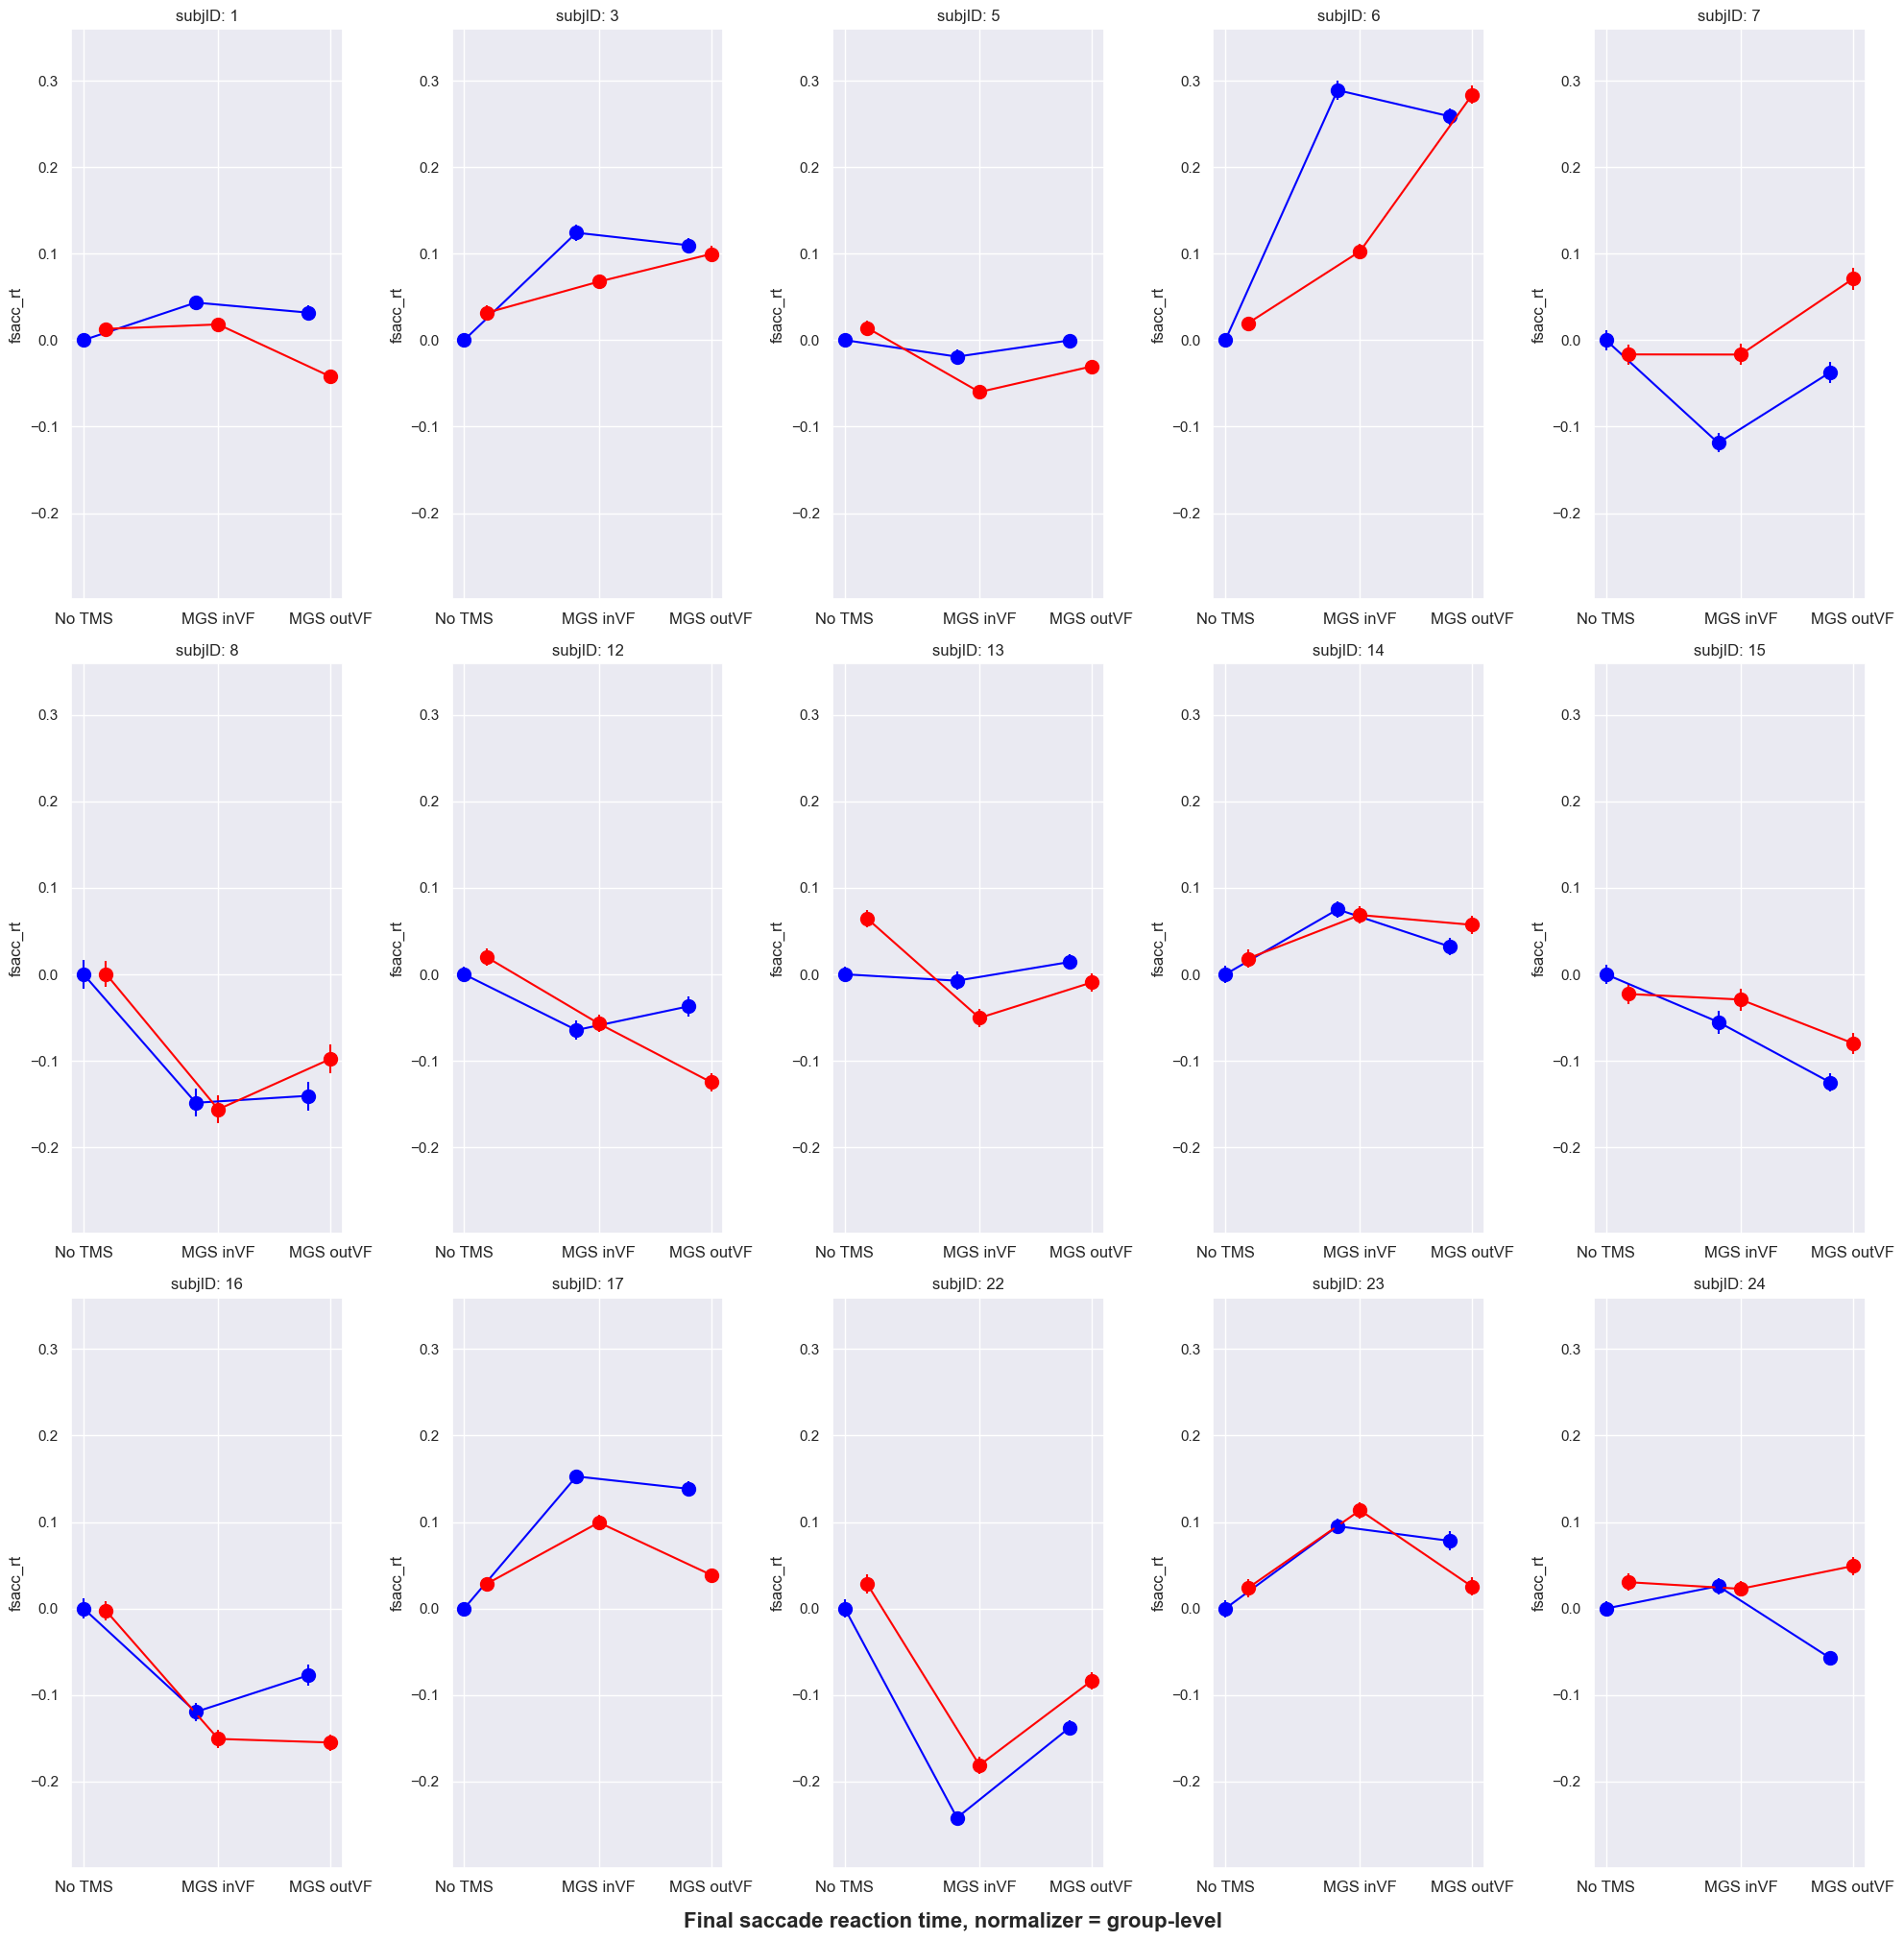

In [5]:
subject_wise_error_plot(df_filtered[df_filtered['subjID'] != 18], 'fsacc_rt', normalizer = 'group_level', indiv_summary = True, remove_outliers = False)

In [ ]:
subject_wise_error_plot(df_filtered[df_filtered['subjID'] != 18], 'fsacc_rt', normalizer = 'individualized', indiv_summary = True, remove_outliers = True)

In [ ]:
# Summary across conditions for subjects
table_summary = pd.pivot_table(df, values = 'fsacc_err', index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: np.sum(~pd.isnull(x)))
table_summary

In [ ]:
raw_error_summary = pd.pivot_table(df_filtered, values = ['fsacc_err', 'fsacc_theta_err', 'fsacc_radius_err'], index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: np.nanmean(np.abs(x)))
raw_error_summary

In [ ]:
error_summary = pd.pivot_table(df_filtered, values = ['fsacc_theta_rot_normed', 'fsacc_theta_rot'], index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: np.nanmean(np.abs(x)))
error_summary

In [ ]:
df_filtered.describe()
df_filtered.describe(include=object)

In [ ]:
subjIDs = df_filtered['subjID'].unique()
#df_filtered = df_filtered[df_filtered['instimVF'] == 0 ]
for ii in range(len(subjIDs)):
    plt.figure()
    plt.plot(df_filtered[df_filtered['subjID']==subjIDs[ii]]['TarX'], df_filtered[df_filtered['subjID']==subjIDs[ii]]['TarY'], 'r.', markersize = 2)
    plt.plot(df_filtered[df_filtered['subjID']==subjIDs[ii]]['fsaccX'], df_filtered[df_filtered['subjID']==subjIDs[ii]]['fsaccY'], 'ks', markersize = 2)
    plt.xlim(-25, 25)
    plt.ylim(-20, 20)
    plt.title(str(subjIDs[ii]))

In [ ]:
subjIDs = df_filtered['subjID'].unique()
#df_filtered = df_filtered[(df_filtered['TarTheta'] > -np.pi/2) & (df_filtered['TarTheta'] < np.pi/2) ]
for ii in range(len(subjIDs)):
    plt.figure()
    plt.plot(df_filtered[df_filtered['subjID']==subjIDs[ii]]['TarX_rotated'], df_filtered[df_filtered['subjID']==subjIDs[ii]]['TarY_rotated'], 'ro', markersize = 4)
    plt.plot(df_filtered[df_filtered['subjID']==subjIDs[ii]]['fsaccX_rotated'], df_filtered[df_filtered['subjID']==subjIDs[ii]]['fsaccY_rotated'], 'ks', markersize = 2)
    plt.xlim([0, 25])
    plt.ylim([-20, 20])
    plt.title(str(subjIDs[ii]))

In [ ]:
table_summary_hh = pd.pivot_table(df, values = 'TarTheta_rotated', index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: (np.max(x) - np.min(x)) * (180/np.pi))
table_summary_hh

In [ ]:
## Check for any existing trend in data due to eccentricity or angular width
subjIDs = df_filtered['subjID'].unique()
angular_width = np.zeros((len(subjIDs), 2) )
eccs = np.zeros((len(subjIDs),2) )
mean_err = np.zeros((len(subjIDs), 2))
median_err = np.zeros((len(subjIDs), 2))
var_err = np.zeros((len(subjIDs), 2))
range_err = np.zeros((len(subjIDs), 2))
err_met = 'fsacc_theta_err'
for ii in range(len(subjIDs)):
    this_subj_df_pro = df_filtered[(df_filtered['subjID']==subjIDs[ii]) & (df_filtered['TMS_condition']=='No TMS') & (df_filtered['ispro']==1) ]
    this_subj_df_anti = df_filtered[(df_filtered['subjID']==subjIDs[ii]) & (df_filtered['TMS_condition']=='No TMS') & (df_filtered['ispro']==0)]
    mean_err[ii, 0] = np.nanmean(this_subj_df_pro[err_met])
    median_err[ii, 0] = np.nanmedian(this_subj_df_pro[err_met])
    var_err[ii, 0] = np.nanvar(this_subj_df_pro[err_met])
    range_err[ii, 0] = np.nanmax(this_subj_df_pro[err_met]) - np.nanmin(this_subj_df_pro[err_met])
    mean_err[ii, 1] = np.nanmean(this_subj_df_anti[err_met])
    median_err[ii, 1] = np.nanmedian(this_subj_df_anti[err_met])
    var_err[ii, 1] = np.nanvar(this_subj_df_anti[err_met])
    range_err[ii, 1] = np.nanmax(this_subj_df_anti[err_met]) - np.nanmin(this_subj_df_anti[err_met])
    angular_width[ii, 0] = (this_subj_df_pro['TarTheta_rotated'].max() - this_subj_df_pro['TarTheta_rotated'].min()) * (180/np.pi)
    angular_width[ii, 1] = (this_subj_df_anti['TarTheta_rotated'].max() - this_subj_df_anti['TarTheta_rotated'].min()) * (180/np.pi)
    eccs[ii, 0] = this_subj_df_pro['TarRadius'].mean()
    eccs[ii, 1] = this_subj_df_anti['TarRadius'].mean()

fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
axs[0, 0].plot(eccs[:, 0], mean_err[:, 0], 'bo')
axs[0, 0].plot(eccs[:, 1], mean_err[:, 1], 'ro')
axs[0, 0].set_xlabel('eccentricity')
axs[0, 0].set_ylabel('mean err')

axs[0, 1].plot(eccs[:, 0], median_err[:, 0], 'bo')
axs[0, 1].plot(eccs[:, 1], median_err[:, 1], 'ro')
axs[0, 1].set_xlabel('eccentricity')
axs[0, 1].set_ylabel('median err')

axs[0, 2].plot(eccs[:, 0], var_err[:, 0], 'bo')
axs[0, 2].plot(eccs[:, 1], var_err[:, 1], 'ro')
axs[0, 2].set_xlabel('eccentricity')
axs[0, 2].set_ylabel('var err')

axs[0, 3].plot(eccs[:, 0], range_err[:, 0], 'bo')
axs[0, 3].plot(eccs[:, 1], range_err[:, 1], 'ro')
axs[0, 3].set_xlabel('eccentricity')
axs[0, 3].set_ylabel('range err')

axs[1, 0].plot(angular_width[:, 0], mean_err[:, 0], 'bo')
axs[1, 0].plot(angular_width[:, 1], mean_err[:, 1], 'ro')
axs[1, 0].set_xlabel('angular_width')
axs[1, 0].set_ylabel('mean err')

axs[1, 1].plot(angular_width[:, 0], median_err[:, 0], 'bo')
axs[1, 1].plot(angular_width[:, 1], median_err[:, 1], 'ro')
axs[1, 1].set_xlabel('angular_width')
axs[1, 1].set_ylabel('median err')

axs[1, 2].plot(angular_width[:, 0], var_err[:, 0], 'bo')
axs[1, 2].plot(angular_width[:, 1], var_err[:, 1], 'ro')
axs[1, 2].set_xlabel('angular_width')
axs[1, 2].set_ylabel('var err')

axs[1, 3].plot(angular_width[:, 0], range_err[:, 0], 'bo')
axs[1, 3].plot(angular_width[:, 1], range_err[:, 1], 'ro')
axs[1, 3].set_xlabel('angular_width')
axs[1, 3].set_ylabel('range err')
plt.show()


Control condition is pro saccades outside VF, where the target and the saccade goal are both located outside the TMS VF. Hence we are interested in seeing if there is a modulation of behavior with respect to this condition. \
Let the errors be: [pNo, pIn, pOut, aNo, aIn, aOut], where pNo = pro saccades with No TMS, pIn = pro saccades in TMS VF, pOut =  pro saccades outside TMS VF, aNo = anti saccades with No TMS, aIn = anti saccades in TMS VF, aOut = anti saccades outside TMS VF. \
The goal is to compare pNo and pIn to pOut.  \
$\therefore error_m = \frac{|pX - pOut|}{pOut} $, where X = No, In, Out \
Similarly, we are interested in comparing aNo and aIn with aOut. and therefore, modulated error for anti-saccades would be: \
$error_m = \frac{|aX - aOut|}{aOut} $, where X = No, In, Out \
However, this negates the obvious difference between anti and pro saccades. Therefore, anti-saccades need to be modulated with the subject-wise baseline difference between anti and pro saccad errors. Hence, the modified formula becomes: \
$error_m = \frac{|aX - aOut|}{aOut} + (aOut - pOut)$, where X = No, In, Out \


Look at raw voltages to remove ERP
NAN out TMS locked pulse and set it to mean of activity before and after.

In [ ]:
df_filtered.columns

In [ ]:
N1 = [1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]
N1[4]

In [ ]:
subjIDs = df_filtered['subjID'].unique()
for ii in range(len(subjIDs)):
   subject_wise_error_plot(df_filtered[df_filtered['subjID'] == subjIDs[ii]], 'isacc_err', False)

subject_wise_error_plot(df_filtered[(df_filtered['subjID'] != 18) & (df_filtered['subjID'] != 8)], 'isacc_err', False)
subject_wise_error_plot(df_filtered, 'isacc_err', False)

In [ ]:
subjIDs = df_filtered['subjID'].unique()
for ii in range(len(subjIDs)):
   subject_wise_error_plot(df_filtered[df_filtered['subjID'] == subjIDs[ii]], 'isacc_rt', False)

subject_wise_error_plot(df_filtered[(df_filtered['subjID'] != 18) & (df_filtered['subjID'] != 8)], 'isacc_rt', False)
subject_wise_error_plot(df_filtered, 'isacc_rt', False)

In [ ]:
subjIDs = df['subjID'].unique()
max_ax = 25
for ss in range(len(subjIDs)):
    subj_df =  df[df['subjID']==subjIDs[ss]]
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))
    plt.suptitle(subjIDs[ss])
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    

    axes[0, 0].set_xlim([-max_ax, max_ax])
    axes[0, 0].set_ylim([-max_ax, max_ax])
    axes[0, 1].set_xlim([-max_ax, max_ax])
    axes[0, 1].set_ylim([-max_ax, max_ax])
    axes[1, 0].set_xlim([-max_ax, max_ax])
    axes[1, 0].set_ylim([-max_ax, max_ax])
    axes[1, 1].set_xlim([-max_ax, max_ax])
    axes[1, 1].set_ylim([-max_ax, max_ax])
    axes[2, 0].set_xlim([-max_ax, max_ax])
    axes[2, 0].set_ylim([-max_ax, max_ax])
    axes[2, 1].set_xlim([-max_ax, max_ax])
    axes[2, 1].set_ylim([-max_ax, max_ax])

    axes[0, 0].set_box_aspect(1)
    axes[0, 1].set_box_aspect(1)
    axes[1, 0].set_box_aspect(1)
    axes[1, 1].set_box_aspect(1)
    axes[2, 0].set_box_aspect(1)
    axes[2, 1].set_box_aspect(1)

    axes[0, 0].set_title('No TMS & pro')
    axes[0, 1].set_title('No TMS & anti')
    axes[1, 0].set_title('TMS intoVF & pro')
    axes[1, 1].set_title('TMS intoVF & anti')
    axes[2, 0].set_title('TMS outVF & pro')
    axes[2, 1].set_title('TMS outVF & anti')
    plt.show()
    

In [ ]:
from scipy.stats import circmean
r = np.linspace(8, 12, 1000)
r_sacc = np.linspace(12, 8, 1000)
theta_rang = np.linspace(-np.pi, np.pi, 1000)
theta_sacc = np.linspace(np.pi, -np.pi, 1000)
x = r * np.cos(theta_rang)
y = r * np.sin(theta_rang)
x_sacc = r_sacc * np.cos(theta_sacc)
y_sacc = r_sacc * np.sin(theta_sacc)
raw_error = np.sqrt((x-x_sacc)**2+(y-y_sacc)**2)

mean_target = circmean(theta_rang, high=np.pi, low=-np.pi)
this_angle = -1*mean_target
#radial_error = np.max(r) - r
#radial_error_sacc = np.max(r) - r_sacc
rotation_matrix = np.array([[np.cos(this_angle), -np.sin(this_angle)],
                                    [np.sin(this_angle), np.cos(this_angle)]])

x_temp = x #+ radial_error * np.cos(theta_rang)
y_temp = y #+ radial_error * np.sin(theta_rang)
input_target = np.vstack((x_temp, y_temp))
rotated_target = np.dot(rotation_matrix, input_target)
x_rot = rotated_target[0]
y_rot = rotated_target[1]

x_sacc_temp = x_sacc #+ radial_error_sacc * np.cos(theta_sacc)
y_sacc_temp = y_sacc #+ radial_error_sacc * np.sin(theta_sacc)
input_sacc = np.vstack((x_sacc_temp, y_sacc_temp))
rotated_sacc = np.dot(rotation_matrix, input_sacc)
x_sacc_rot = rotated_sacc[0]
y_sacc_rot = rotated_sacc[1]

rot_error = np.sqrt((x_rot-x_sacc_rot)**2+(y_rot-y_sacc_rot)**2)

theta_targ_estim = np.arctan2(y, x)
theta_targ_rot_estim = np.arctan2(y_rot, x_rot)
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x_sacc, y_sacc, 'ks', markersize = 2)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.show()

plt.figure()
plt.plot(x_rot, y_rot, 'ro')
plt.plot(x_sacc_rot, y_sacc_rot, 'ks', markersize = 2)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.show()


In [ ]:
plt.plot(raw_error, rot_error, 'ks', markersize = 2)
plt.plot(np.linspace(0, 25, 100), np.linspace(0, 25, 100), 'mo', markersize =2)
#plt.xlim([0, 5])
#plt.ylim([0, 5])
plt.show()

In [ ]:
plt.plot(theta_targ_estim, theta_targ_rot_estim, 'ks', markersize = 2)
#plt.plot(np.linspace(0, 25, 100), np.linspace(0, 25, 100), 'mo', markersize =2)
#plt.xlim([0, 5])
#plt.ylim([0, 5])
plt.show()

In [ ]:
subjIDs = df['subjID'].unique()
max_ax = 25
nbins = 70
for ss in range(len(subjIDs)):
    subj_df =  df[(df['subjID']==subjIDs[ss]) & (df['rejtrials']!=1)]
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))
    plt.suptitle(subjIDs[ss])
    axes[0, 0].hist2d(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[0, 1].hist2d(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[1, 0].hist2d(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[1, 1].hist2d(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[2, 0].hist2d(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[2, 1].hist2d(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    

    axes[0, 0].set_xlim([0, max_ax])
    axes[0, 0].set_ylim([-max_ax, max_ax])
    axes[0, 1].set_xlim([0, max_ax])
    axes[0, 1].set_ylim([-max_ax, max_ax])
    axes[1, 0].set_xlim([0, max_ax])
    axes[1, 0].set_ylim([-max_ax, max_ax])
    axes[1, 1].set_xlim([0, max_ax])
    axes[1, 1].set_ylim([-max_ax, max_ax])
    axes[2, 0].set_xlim([0, max_ax])
    axes[2, 0].set_ylim([-max_ax, max_ax])
    axes[2, 1].set_xlim([0, max_ax])
    axes[2, 1].set_ylim([-max_ax, max_ax])

    axes[0, 0].set_box_aspect(1)
    axes[0, 1].set_box_aspect(1)
    axes[1, 0].set_box_aspect(1)
    axes[1, 1].set_box_aspect(1)
    axes[2, 0].set_box_aspect(1)
    axes[2, 1].set_box_aspect(1)

    axes[0, 0].set_title('No TMS & pro')
    axes[0, 1].set_title('No TMS & anti')
    axes[1, 0].set_title('TMS intoVF & pro')
    axes[1, 1].set_title('TMS intoVF & anti')
    axes[2, 0].set_title('TMS outVF & pro')
    axes[2, 1].set_title('TMS outVF & anti')
    plt.show()

In [ ]:
df_filtered['fsacc_err'] = np.sqrt((df_filtered['fsaccX'] - df_filtered['TarX'])**2 + (df_filtered['fsaccY'] - df_filtered['TarY'])**2)

In [ ]:
quick_visualization(df_filtered)

In [ ]:
distribution_plots(df_filtered)